# Tugas 1 : Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [41]:
import numpy as np
import pandas as pd


In [42]:
# Mengimpor dataset 
data = pd.read_csv('insurance.csv')

# melihat beberapa data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
# mengecek ukuran data
data.shape

# melihat informasi data
data.info()

# melihat deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\shofiatul\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


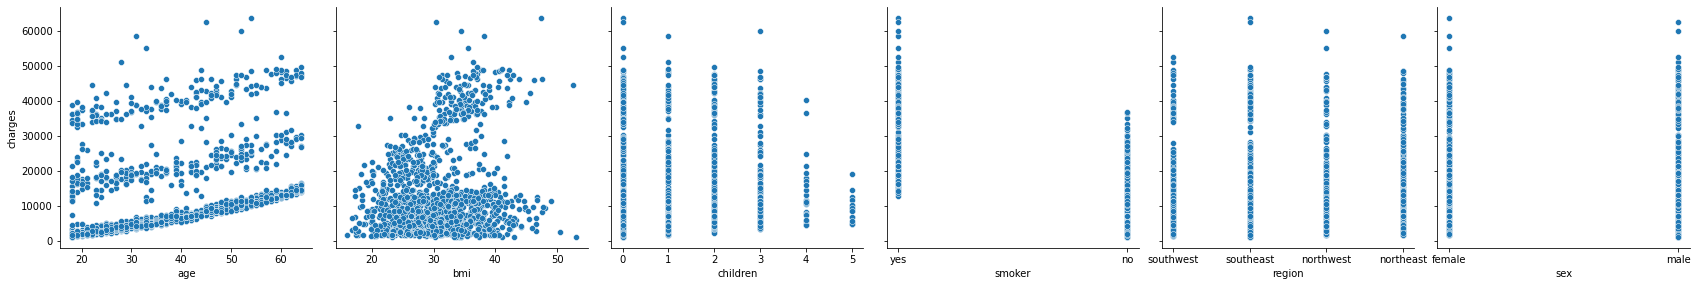

In [44]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
# operasi visualisasi
sns.pairplot(data, x_vars=['age', 'bmi','children', 'smoker', 'region', 'sex'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [74]:
# Membagi dataset menjadi data fitur (x) dan data target (y)
X = data['charges']
y = data['age']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936,) (402,) (936,) (402,)


3. Lakukan feature scaling jika diperlukan.

In [76]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np

# Contoh data X dan y
X = np.array([[1], [2], [3], [4], [5]])  # Ganti dengan data aktual Anda
y = np.array([2, 4, 5, 4, 5])  # Ganti dengan data aktual Anda

# Transformasi standar untuk X dan y
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Fitting SVR ke dataset yang sudah diubah
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)


SVR()

4. Buat model multiple linear regression menggunakan Scikit-Learn.

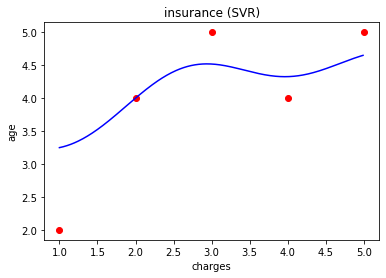

In [79]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('insurance (SVR)')
plt.xlabel('charges')
plt.ylabel('age')
plt.show()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [80]:
X_train
y_train

966     51
522     51
155     44
671     29
1173    38
        ..
802     21
53      36
350     57
79      41
792     22
Name: age, Length: 936, dtype: int64

In [81]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

c:\Users\shofiatul\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const      34.329287
charges     0.000360
dtype: float64

In [32]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     99.76
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           2.18e-22
Time:                        19:00:11   Log-Likelihood:                -3755.6
No. Observations:                 936   AIC:                             7515.
Df Residuals:                     934   BIC:                             7525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3293      0.646     53.137      0.000      33.061      35.597
charges        0.0004   3.61e-05      9.988      0.000       0.000       0.000
==============================================================================
Omnibus:                      232.868   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.519
Skew:                          -0.031   Prob(JB):                     9.64e-10
Kurtosis:                       1.970   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
print(f'r2:\n{r_squared}')

r2:
0.07143177723285843


6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [83]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
prediksi_umur = np.array([[20]])
# Penskalaan fitur untuk data yang akan diprediksi
prediksi_umur = sc_X.transform(prediksi_umur)
# Melakukan prediksi menggunakan model SVR
prediksi_harga = regressor.predict(prediksi_umur)
# Kembalikan hasil prediksi ke skala aslinya
prediksi_harga = sc_y.inverse_transform(prediksi_harga.reshape(-1, 1))

# Menampilkan hasil prediksi
print("Prediksi Harga untuk umur 20 :", prediksi_harga[0])

Prediksi Harga untuk umur 20 : [8.51786354]


In [86]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pastikan model 'svr_regressor' telah diinisialisasi dan difit dengan data yang sesuai
# Pastikan 'sc_y' telah diinisialisasi dan digunakan untuk transformasi standar pada 'y_scaled'
# Pastikan 'X_scaled' adalah data yang sesuai

y_actual2 = sc_y.inverse_transform(y_scaled) 
y_pred2 = regressor.predict(X_scaled)

# Menghitung MAE
mae2 = mean_absolute_error(y_actual2, y_pred2)

# Menghitung MSE
mse2 = mean_squared_error(y_actual2, y_pred2)

# Menghitung RMSE
rmse2 = np.sqrt(mse2)

# Menghitung R-squared
r22 = r2_score(y_actual2, y_pred2)

print("MAE:", mae2)
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R-squared:", r22)


MAE: 1.191606360494082
MSE: 1.8858294542770566
RMSE: 1.3732550579834237
R-squared: -0.5715245452308804
